In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip3 install PyMuPDF Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 5.3 MB/s 


In [3]:
!pip install img2pdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.6 MB/s 
     |████████████████████████████████| 2.4 MB 33.0 MB/s 
  Created wheel for img2pdf: filename=img2pdf-0.4.4-py3-none-any.whl size=44881 sha256=2562a6709d07db9e0774a383f801a41704df804b4058489f432874ef8dd19a21
  Stored in directory: /root/.cache/pip/wheels/d2/a7/53/9983aef9861f91881984e08f376e3119bdfeeecf55bd36e585
Successfully built img2pdf


In [4]:
!cp /content/drive/MyDrive/BTP/Understanding_Air_and_Space_Vehicle/Understanding_Air_and_Space_Vehicle-master.zip /content
!unzip /content/Understanding_Air_and_Space_Vehicle-master.zip

Archive:  /content/Understanding_Air_and_Space_Vehicle-master.zip
2ade3d25682c8dc5f2de916ac9f3af1fa90e7ef5
   creating: Understanding_Air_and_Space_Vehicle-master/
  inflating: Understanding_Air_and_Space_Vehicle-master/.cursor.txt  
   creating: Understanding_Air_and_Space_Vehicle-master/Comments/
 extracting: Understanding_Air_and_Space_Vehicle-master/Comments/README.md  
  inflating: Understanding_Air_and_Space_Vehicle-master/Comments/Timelog.json  
  inflating: Understanding_Air_and_Space_Vehicle-master/CorrectorOutput.rar  
   creating: Understanding_Air_and_Space_Vehicle-master/CorrectorOutput/
 extracting: Understanding_Air_and_Space_Vehicle-master/CorrectorOutput/README.md  
  inflating: Understanding_Air_and_Space_Vehicle-master/CorrectorOutput/p-001.bbox  
  inflating: Understanding_Air_and_Space_Vehicle-master/CorrectorOutput/p-001.dict  
  inflating: Understanding_Air_and_Space_Vehicle-master/CorrectorOutput/p-001.hocr  
  inflating: Understanding_Air_and_Space_Vehicle-mast

In [5]:
import img2pdf
from PIL import Image
import os

image = Image.open("/content/Understanding_Air_and_Space_Vehicle-master/Images/p-040.jpg")
pdf_bytes = img2pdf.convert(image.filename)
file = open("/content/0.pdf", "wb")
  
# writing pdf files with chunks
file.write(pdf_bytes)


1411259

In [ ]:
import fitz
pdf = fitz.open("/content/0.pdf")

In [ ]:
import io
from tqdm import tqdm

for i in tqdm(range(len(pdf)), desc="pages"):
    for img in tqdm(pdf.get_page_images(i), desc="page_images"):
        xref = img[0]
        image = pdf.extract_image(xref)
        pix = fitz.Pixmap(pdf, xref)
        pix.save(os.path.join("/content", "{}.png".format(i)))

pages: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


In [ ]:
# for page_index in range(len(pdf)):
#     # get the page itself
#     page = pdf[page_index]
#     image_list = page.get_images()
#     # printing number of images found in this page
#     if image_list:
#         print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
#     else:
#         print("[!] No images found on page", page_index)
#     for image_index, img in enumerate(page.get_images(), start=1):
#         # get the XREF of the image
#         xref = img[0]
#         # extract the image bytes
#         base_image = pdf.extract_image(xref)
#         image_bytes = base_image["image"]
#         # get the image extension
#         image_ext = base_image["ext"]
#         # load it to PIL
#         image = Image.open(io.BytesIO(image_bytes))
#         # save it to local disk
#         image.save(open(f"image{page_index+1}_{image_index}.{image_ext}", "wb"))

The above will work only if the pdf is searchable

# Get Docbank annotations

In [6]:
DOCBANK_DIR = "/content/drive/MyDrive/BTP/Understanding_Air_and_Space_Vehicle/DocbankFasterRCNNRes"
DOCTR_ANN_DIR = "/content/drive/MyDrive/BTP/Understanding_Air_and_Space_Vehicle/json"
DOCTR_IMG_DIR = "/content/drive/MyDrive/BTP/Understanding_Air_and_Space_Vehicle/images"


In [7]:
docbank_f=set(os.listdir(os.path.join(DOCBANK_DIR,"images")))
doctr_f=set(os.listdir(DOCTR_IMG_DIR))
# doctr_f
images=list(docbank_f.intersection(doctr_f))

In [8]:
import numpy as np

test="p-020"
bboxes=np.load(os.path.join(DOCBANK_DIR,"boxes","{}.npy".format(test)))
categories=np.load(os.path.join(DOCBANK_DIR,"classes","{}.npy".format(test)))
print(bboxes,categories)

[[ 441.5024  1848.1947  2179.8003  2884.6072 ]
 [ 442.43643 3025.4841   464.64877 3080.2812 ]
 [ 584.6678   389.48886 2025.7335  1629.251  ]
 [ 446.37198  287.9809   480.8057   342.1587 ]
 [ 442.53214 1662.9751   659.90106 1706.7212 ]
 [ 442.2765  1661.9176  2182.574   1755.5825 ]
 [ 530.1148   286.39334 1647.2286   344.62897]
 [1145.9983  1361.8615  1411.387   1420.6727 ]
 [1270.0792   687.01025 1624.15     730.26355]
 [1149.5448  1138.9058  1402.137   1190.474  ]
 [ 687.7221  1137.597    833.88226 1191.5536 ]
 [1267.4928   463.5695  1621.0391   507.50436]
 [1177.1285   925.63245 1479.8691   980.3611 ]
 [ 614.5071   905.9163   755.8335   964.47437]
 [ 889.4487  1016.6273  1015.2983  1060.9728 ]
 [ 884.42065 1286.4921  1008.53845 1333.3706 ]
 [ 824.31976  449.82852 1024.6161   500.92484]
 [1274.295    582.96155 1606.2987   625.5363 ]
 [ 851.9854   845.2438   996.22687  895.5022 ]
 [ 909.52344 1454.4258  1031.9954  1506.7861 ]] [ 8  8  5 10  8  2 10  8  8  8  8  8  8  8  8  8  8  8  8  

In [9]:
image_box=[]
for i,j in zip(bboxes,categories):
    if j==5:
        image_box.append(i)

image_box

[array([ 584.6678 ,  389.48886, 2025.7335 , 1629.251  ], dtype=float32)]

In [10]:
def bb_iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    return interArea

In [11]:
import json 

doctr_anns=[]
f=open(os.path.join(DOCTR_ANN_DIR,"{}.json".format(test)))
doctr_data = json.load(f)
for page in doctr_data["pages"]:
    h,w=page["dimensions"]
    for block in page["blocks"]:
        lines=block["lines"]
        for line in lines:
            words=line["words"]
            for word in words:
                # print(word["value"])
                x1,y1,x2,y2=word["geometry"][0][0]*w, word["geometry"][0][1]*h, word["geometry"][1][0]*w, word["geometry"][1][1]*h
                box=np.array([x1,y1,x2,y2])
                for bbox in image_box:
                    if bb_iou(bbox,box)>=(0.9*(x2-x1)*(y2-y1)):
                        doctr_anns.append(box)


doctr_anns

[array([826.19238281, 455.62890625, 957.02636719, 507.015625  ]),
 array([ 959.44921875,  455.62890625, 1034.55761719,  510.44140625]),
 array([814.078125  , 592.66015625, 944.91210938, 644.046875  ]),
 array([ 944.91210938,  592.66015625, 1020.02050781,  644.046875  ]),
 array([1024.86621094,  530.99609375, 1104.8203125 ,  657.75      ]),
 array([860.11230469, 702.28515625, 944.91210938, 753.671875  ]),
 array([ 942.48925781,  702.28515625, 1020.02050781,  753.671875  ]),
 array([847.99804688, 846.16796875, 930.375     , 900.98046875]),
 array([ 930.375     ,  846.16796875, 1007.90625   ,  900.98046875]),
 array([ 886.76367188, 1010.60546875,  952.18066406, 1068.84375   ]),
 array([ 949.7578125, 1014.03125  , 1027.2890625, 1068.84375  ]),
 array([1267.15136719,  469.33203125, 1630.57910156,  517.29296875]),
 array([1276.84277344,  589.234375  , 1618.46484375,  626.91796875]),
 array([1271.99707031,  692.0078125 , 1630.57910156,  739.96875   ]),
 array([1051.51757812,  654.32421875, 10

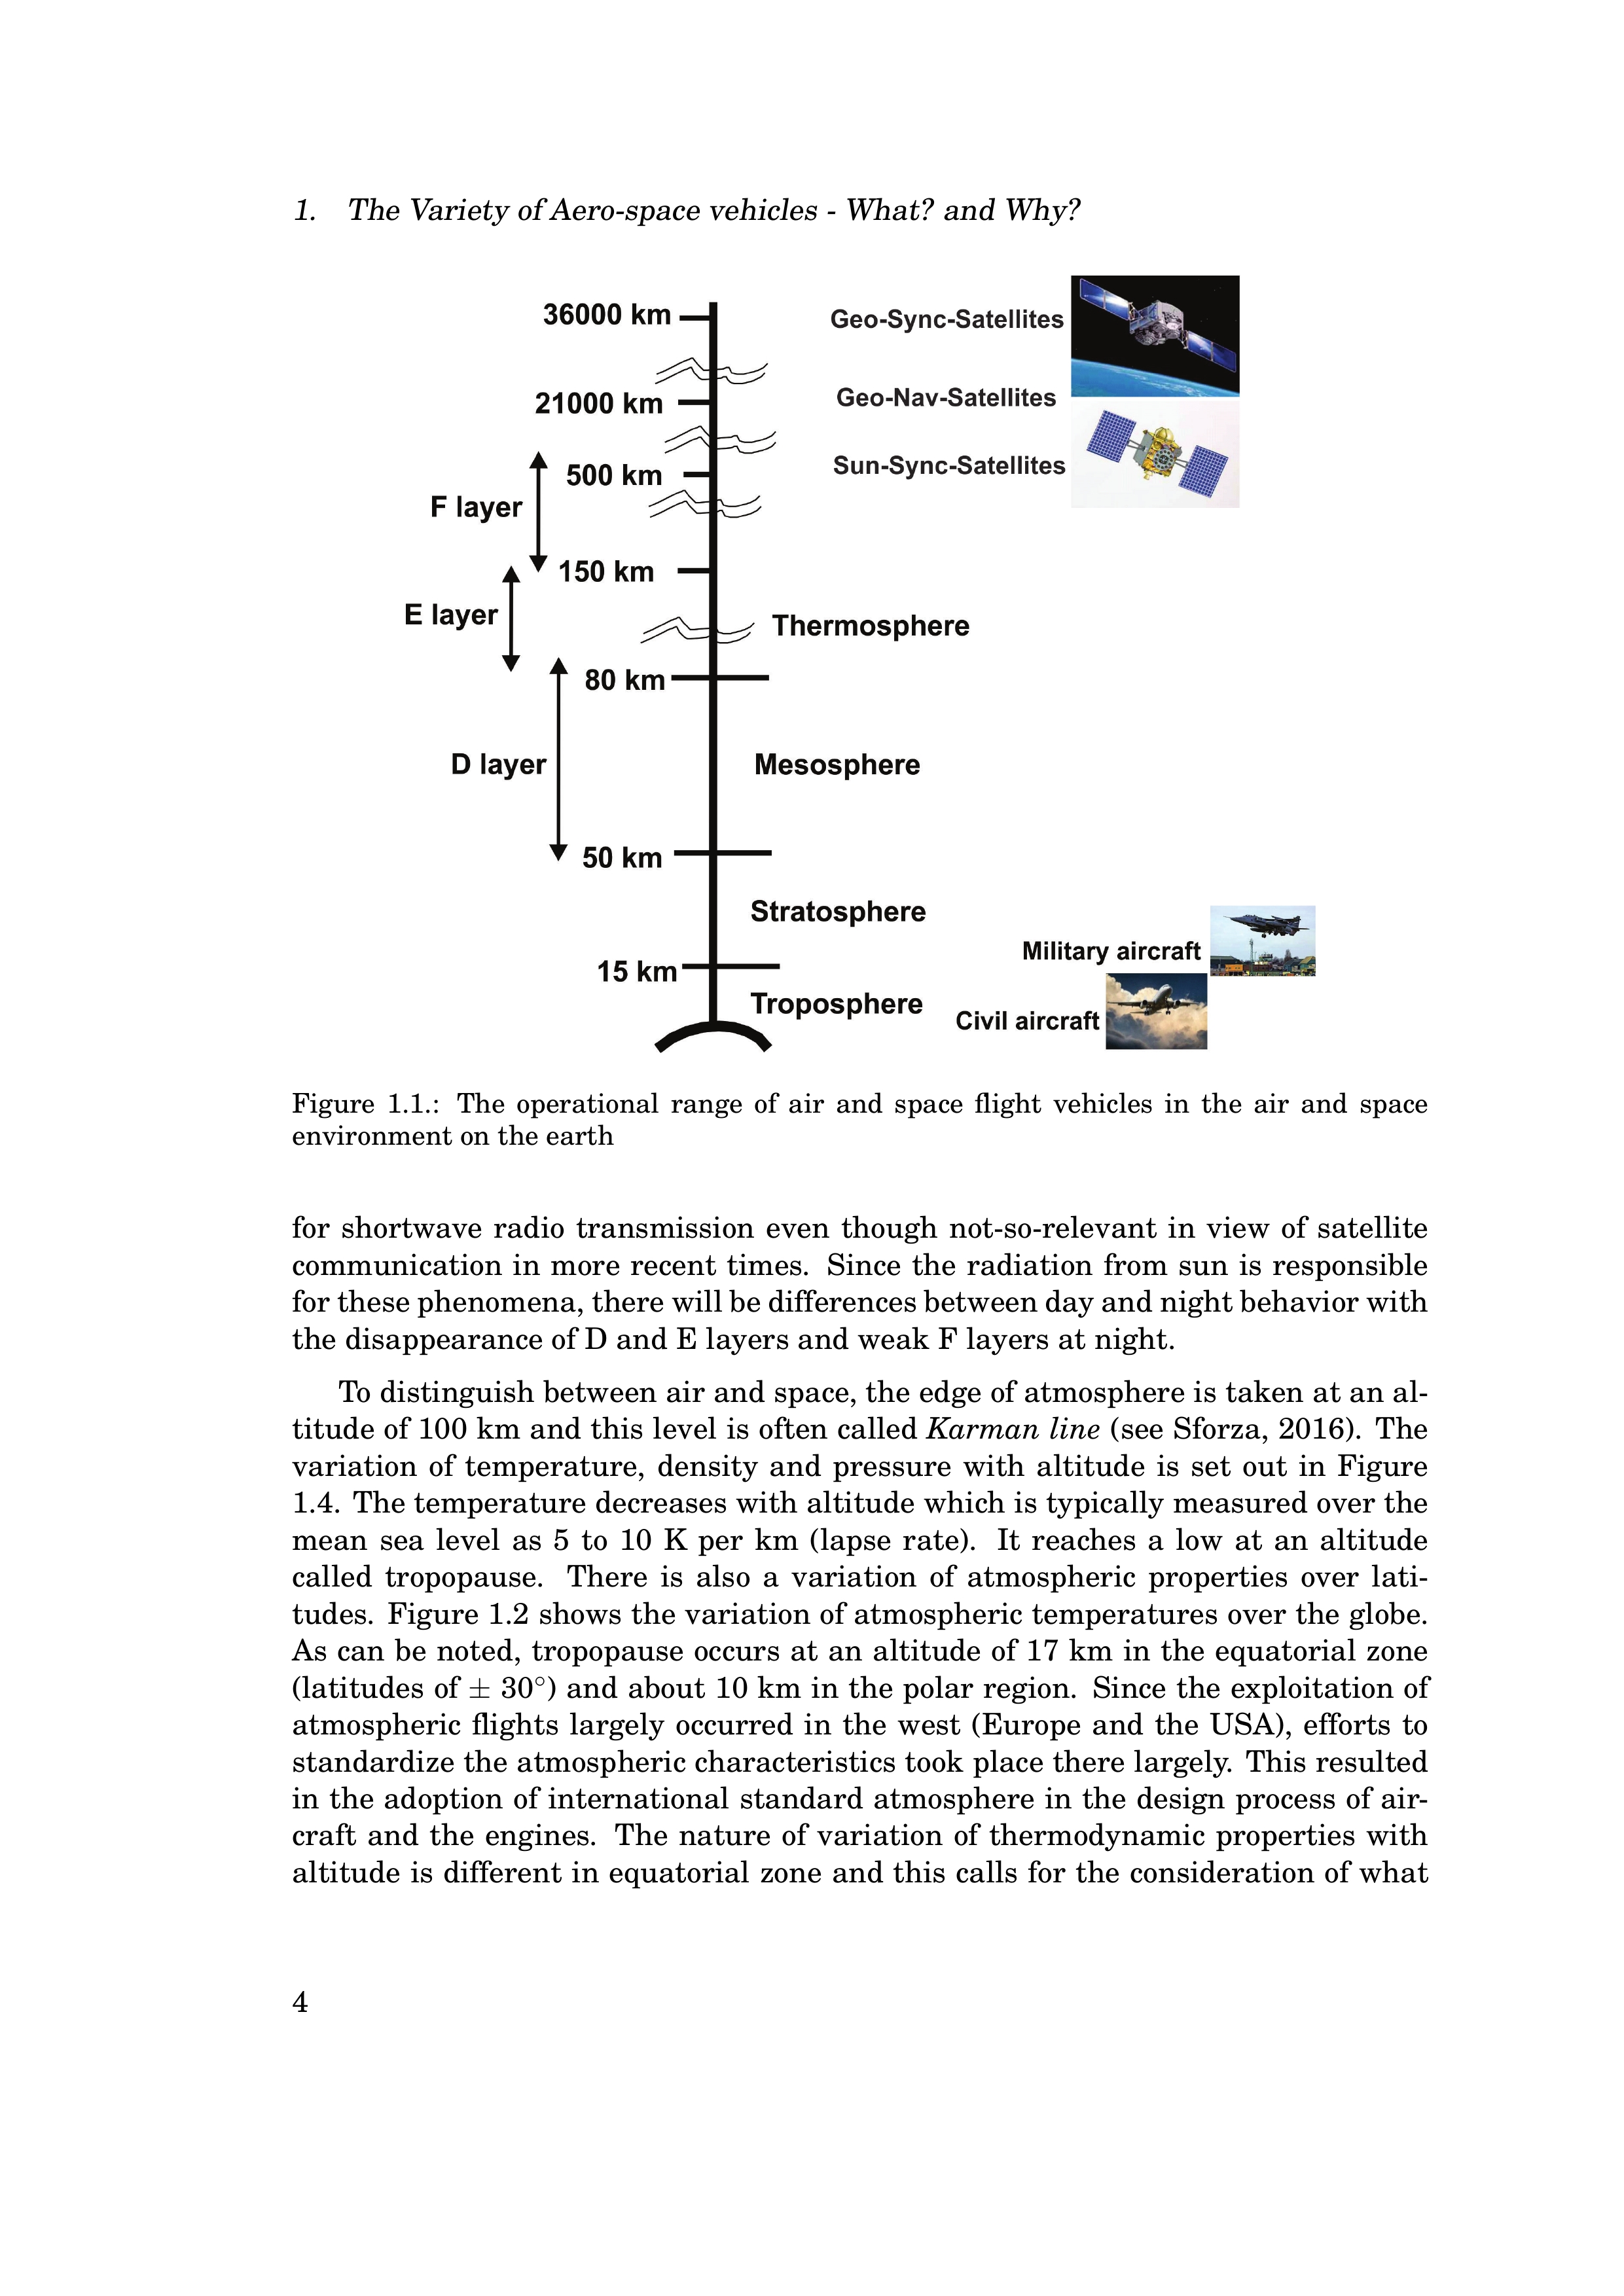

In [12]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread(os.path.join("/content/Understanding_Air_and_Space_Vehicle-master/Images","{}.jpg".format(test)))
cv2_imshow(image)

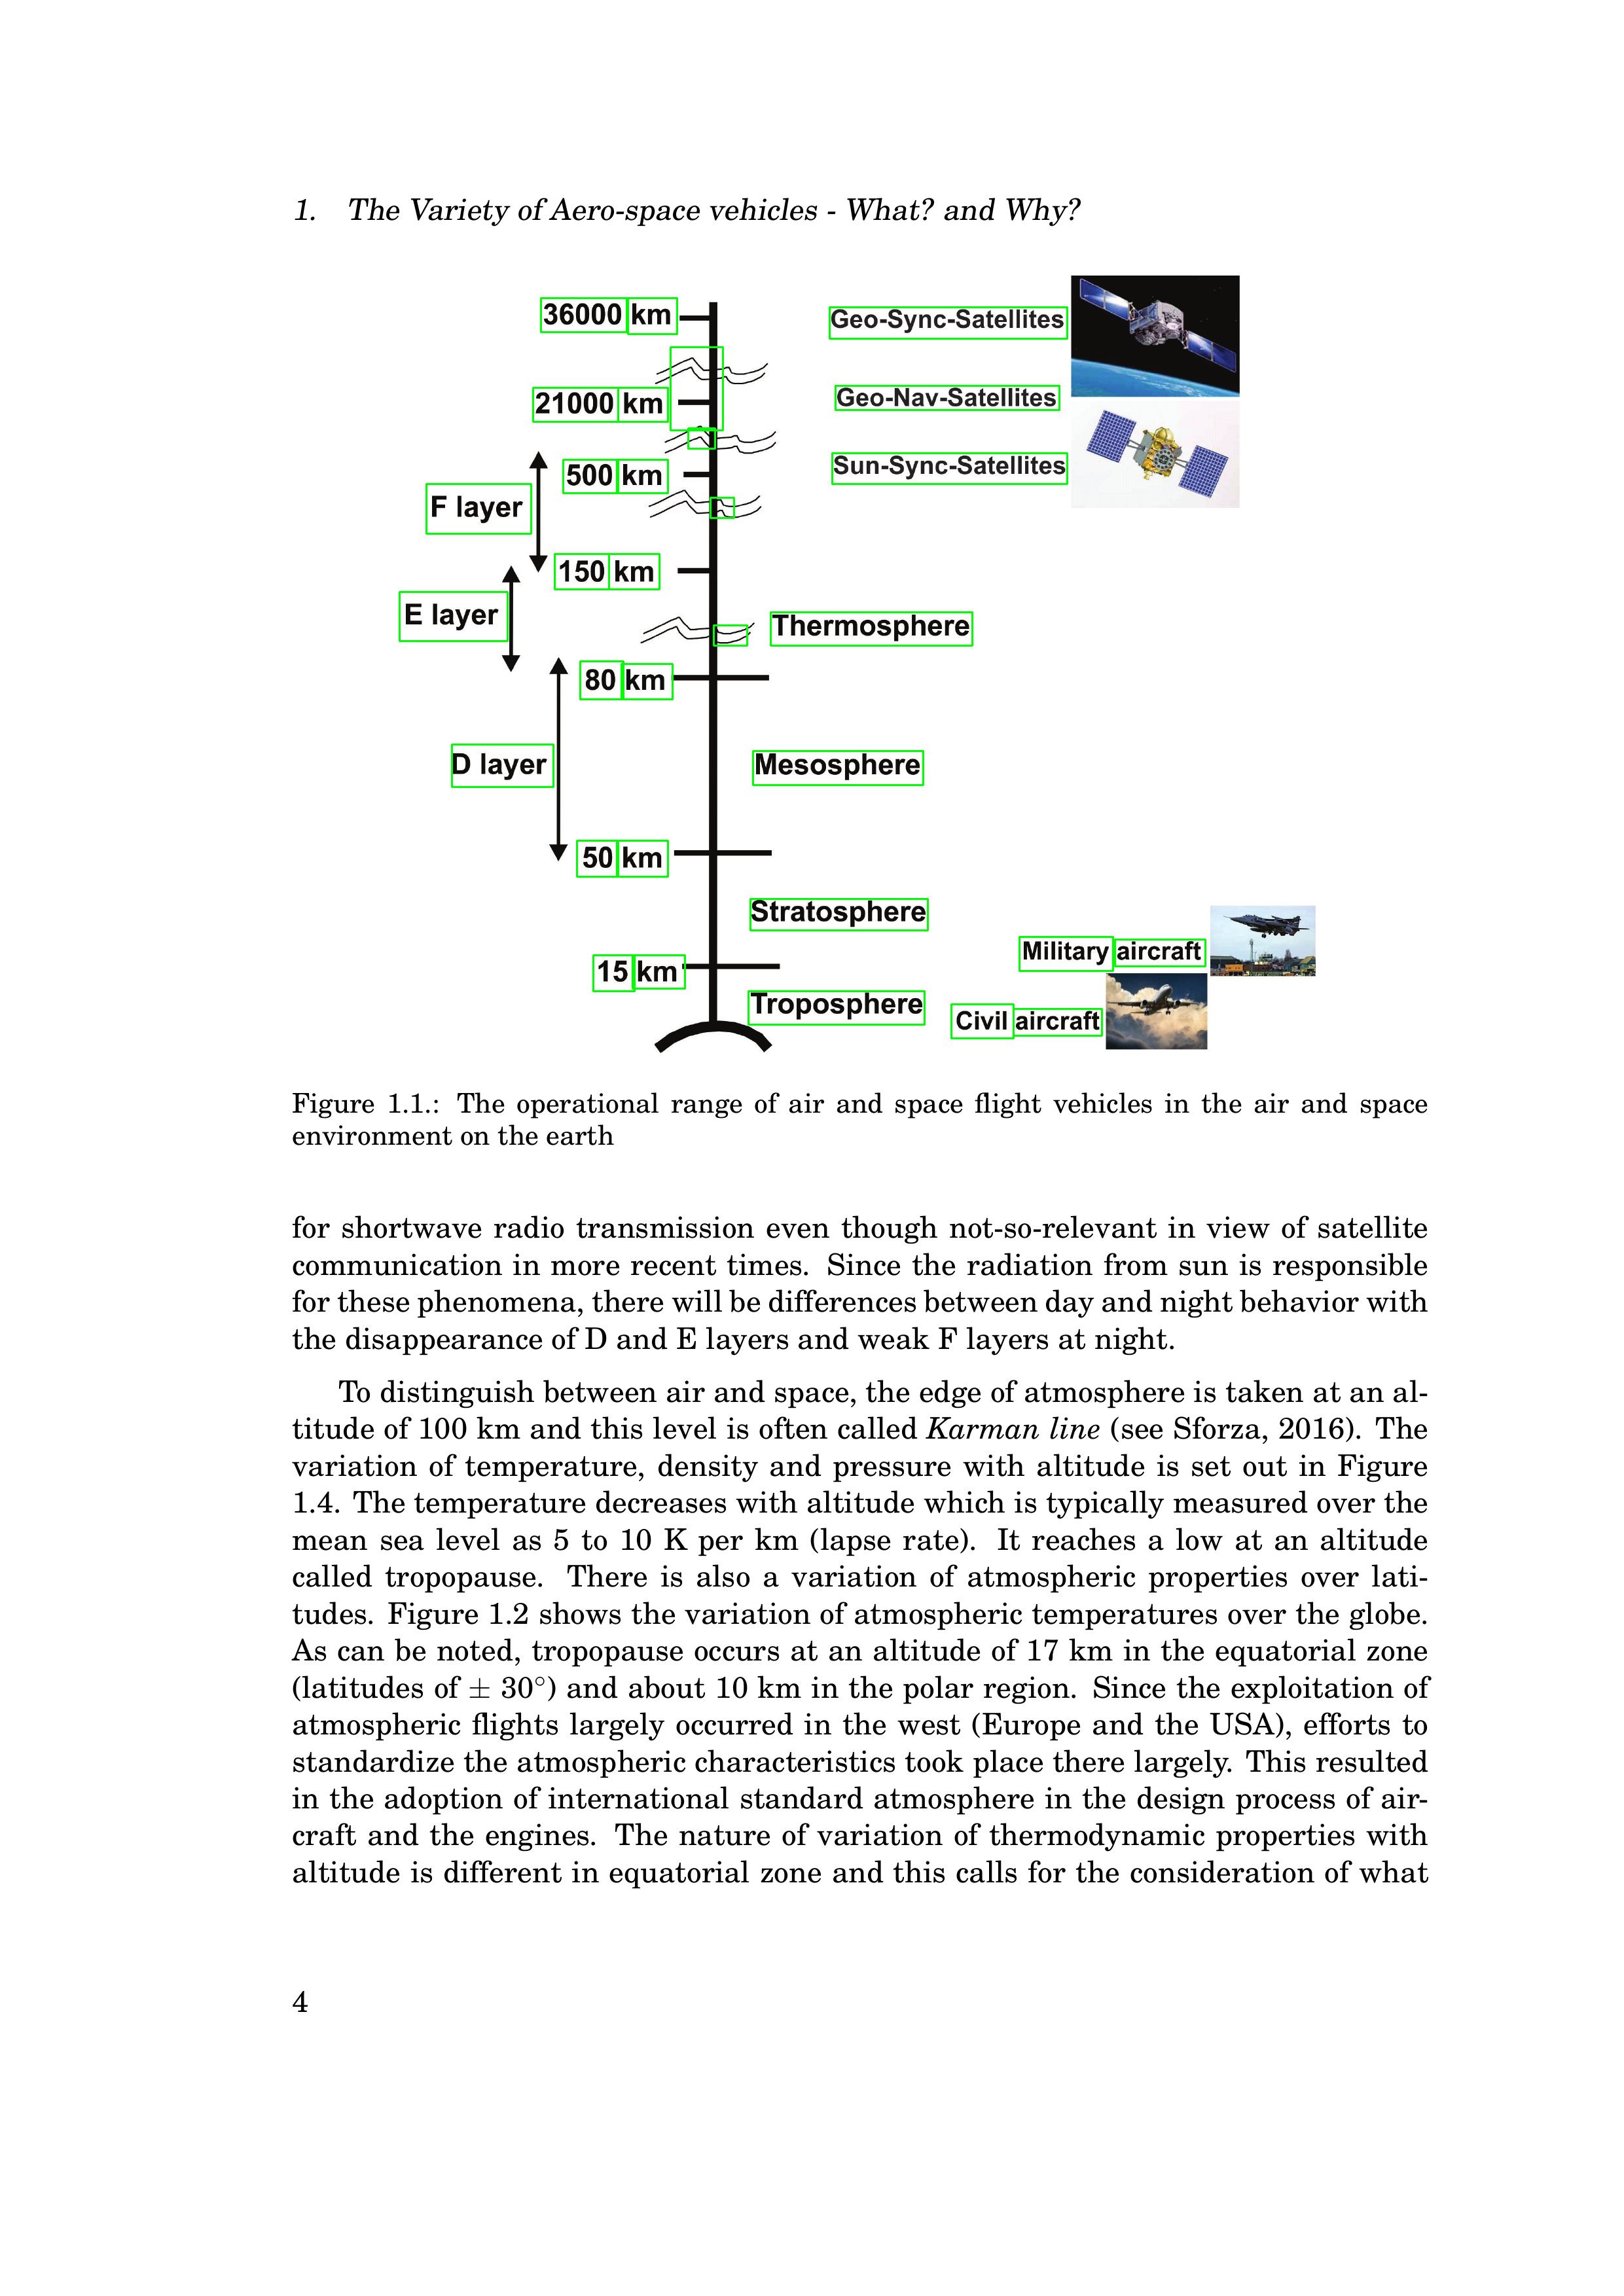

In [13]:
for box in doctr_anns:
    sp=(int(box[0]),int(box[1]))
    fp=(int(box[2]),int(box[3]))
    color = (0, 255, 0)
    thickness = 2
    image = cv2.rectangle(image, sp, fp, color, thickness)

cv2_imshow(image)

# Line boxes

In [16]:
import json 

line_anns=[]
line_anns2=[]
f=open(os.path.join(DOCTR_ANN_DIR,"{}.json".format(test)))
doctr_data = json.load(f)
for page in doctr_data["pages"]:
    h,w=page["dimensions"]
    for block in page["blocks"]:
        lines=block["lines"]
        min_x1=1e6
        max_x2=-1
        min_y1=1e6
        max_y2=-1
        for line in lines:
            x1,y1,x2,y2=line["geometry"][0][0]*w, line["geometry"][0][1]*h, line["geometry"][1][0]*w, line["geometry"][1][1]*h
            line_anns2.append(np.array([x1,y1,x2,y2]))
            print(line.keys())
            words=line["words"]
            for word in words:
                # print(word["value"])
                x1,y1,x2,y2=word["geometry"][0][0]*w, word["geometry"][0][1]*h, word["geometry"][1][0]*w, word["geometry"][1][1]*h
                if x1<min_x1:
                    min_x1=x1
                if y1<min_y1:
                    min_y1=y1
                if x2>max_x2:
                    max_x2=x2
                if y2>max_y2:
                    max_y2=y2

            line_anns.append(np.array([min_x1,min_y1,max_x2,max_y2])) 


for i,j in zip(line_anns,line_anns2):
    print(i)
    print(j)
    print("###################")

dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(['geometry', 'words'])
dict_keys(

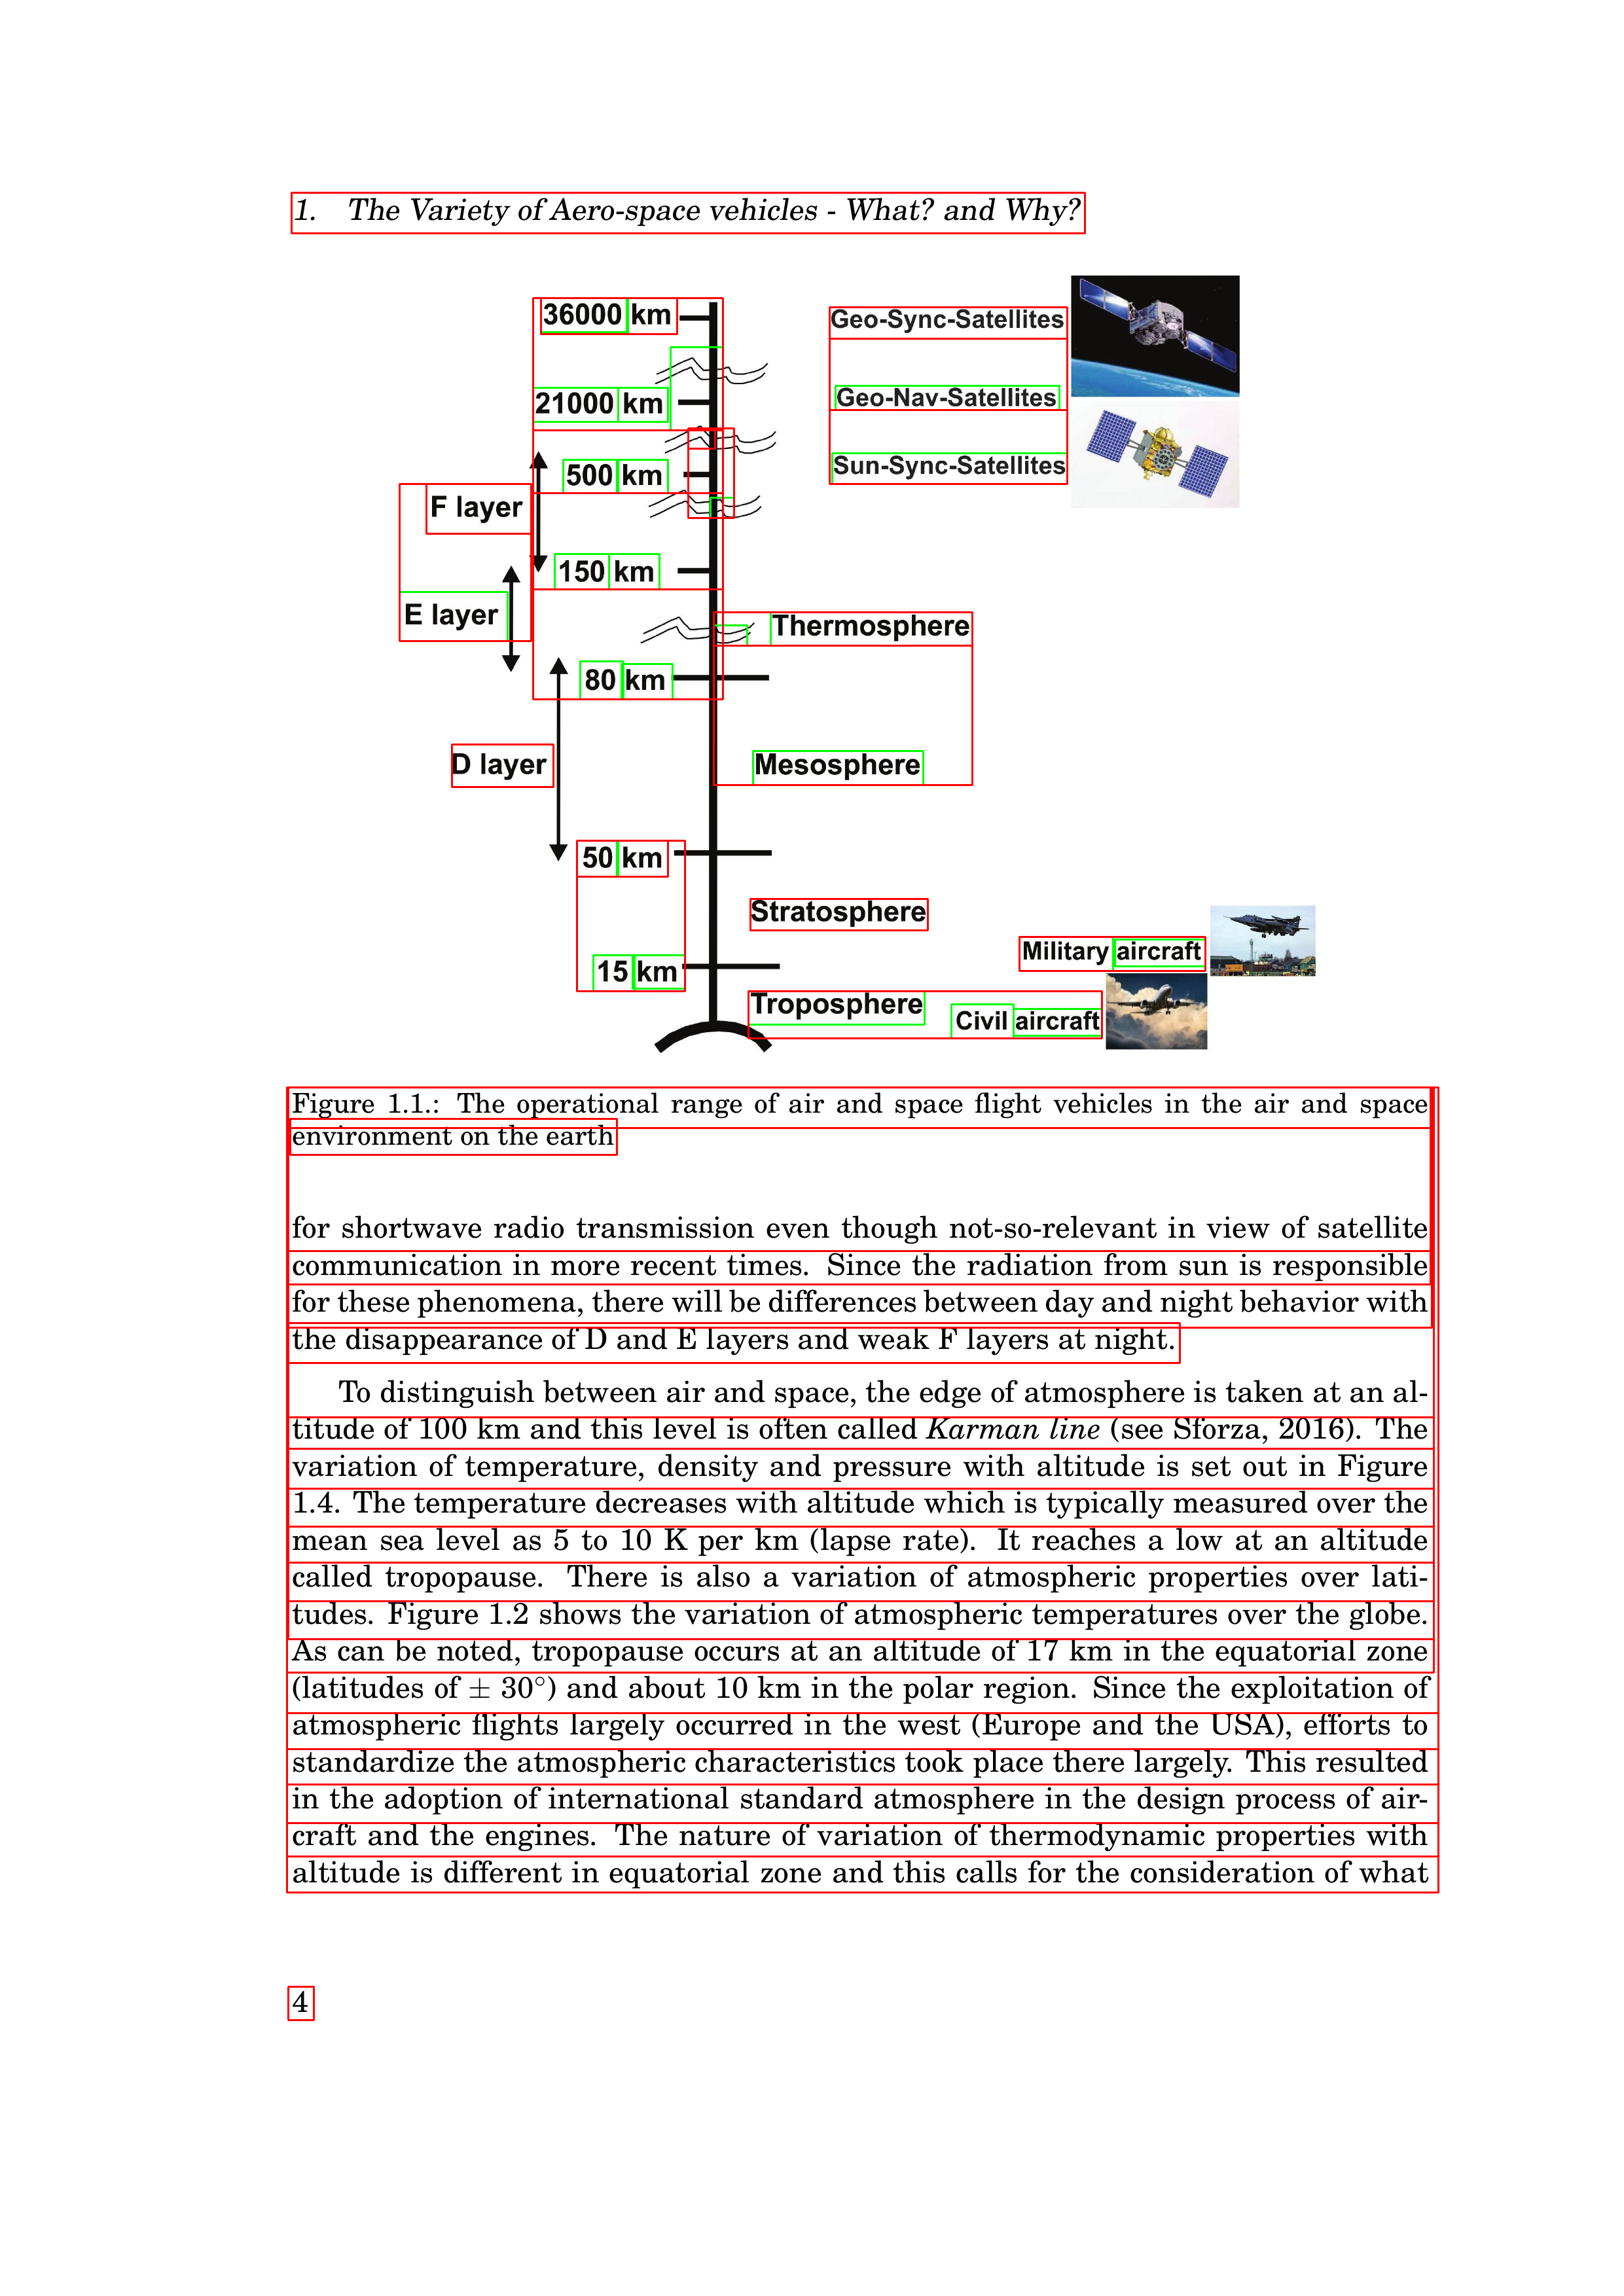

In [17]:
for box in line_anns:
    sp=(int(box[0]),int(box[1]))
    fp=(int(box[2]),int(box[3]))
    color = (0, 0, 255)
    thickness = 2
    image = cv2.rectangle(image, sp, fp, color, thickness)

cv2_imshow(image)

# Get per category line width, scaled by the page width

In [39]:
paragraph_line_width=[]
image_line_width=[]
table_line_width=[]
equation_line_width=[]

c=0
for f in images:
    print(f)
    base_name = os.path.basename(f)
    img_path = os.path.join("/content/Understanding_Air_and_Space_Vehicle-master/Images",f)
    jf=open(os.path.join(DOCTR_ANN_DIR, "{}.json".format(base_name.replace(".jpg",""))))
    doctr_data=json.load(jf)
    for page in doctr_data["pages"]:
        h,w=page["dimensions"]
        bboxes=np.load(os.path.join(DOCBANK_DIR,"boxes","{}.npy".format(base_name.replace(".jpg",""))))
        categories=np.load(os.path.join(DOCBANK_DIR,"classes","{}.npy".format(base_name.replace(".jpg",""))))

        for block in page["blocks"]:
            lines=block["lines"]
            for line in lines:
                x1,y1,x2,y2=line["geometry"][0][0]*w, line["geometry"][0][1]*h, line["geometry"][1][0]*w, line["geometry"][1][1]*h
                box=np.array([x1,y1,x2,y2])
                for i,j in zip(bboxes,categories):
                    # print(bb_iou(box,i))
                    # print(0.9*(x2-x1)*(y2-y1))
                    if bb_iou(i,box)>=(0.9*(x2-x1)*(y2-y1)):
                        # print("here")
                        if j==5:
                            image_line_width.append((x2-x1)/w)
                        elif j==11:
                            table_line_width.append((x2-x1)/w)
                        elif j==4:
                            equation_line_width.append((x2-x1)/w)
                        else:
                            paragraph_line_width.append((x2-x1)/w)

p-198.jpg
p-040.jpg
p-111.jpg
p-178.jpg
p-049.jpg
p-085.jpg
p-106.jpg
p-039.jpg
p-127.jpg
p-109.jpg
p-003.jpg
p-180.jpg
p-184.jpg
p-086.jpg
p-022.jpg
p-104.jpg
p-110.jpg
p-056.jpg
p-092.jpg
p-034.jpg
p-014.jpg
p-067.jpg
p-084.jpg
p-097.jpg
p-050.jpg
p-130.jpg
p-151.jpg
p-058.jpg
p-019.jpg
p-010.jpg
p-045.jpg
p-121.jpg
p-112.jpg
p-135.jpg
p-160.jpg
p-187.jpg
p-080.jpg
p-079.jpg
p-004.jpg
p-169.jpg
p-020.jpg
p-185.jpg
p-017.jpg
p-059.jpg
p-041.jpg
p-131.jpg
p-076.jpg
p-115.jpg
p-060.jpg
p-128.jpg
p-026.jpg
p-025.jpg
p-136.jpg
p-137.jpg
p-174.jpg
p-002.jpg
p-077.jpg
p-122.jpg
p-068.jpg
p-033.jpg
p-117.jpg
p-194.jpg
p-009.jpg
p-048.jpg
p-146.jpg
p-173.jpg
p-189.jpg
p-015.jpg
p-081.jpg
p-197.jpg
p-043.jpg
p-183.jpg
p-035.jpg
p-070.jpg
p-113.jpg
p-095.jpg
p-125.jpg
p-203.jpg
p-090.jpg
p-037.jpg
p-159.jpg
p-162.jpg
p-133.jpg
p-163.jpg
p-179.jpg
p-150.jpg
p-202.jpg
p-176.jpg
p-118.jpg
p-064.jpg
p-186.jpg
p-063.jpg
p-166.jpg
p-193.jpg
p-139.jpg
p-177.jpg
p-132.jpg
p-024.jpg
p-016.jpg
p-028.jpg


In [38]:
paragraph_line_width

[0.7021484375,
 0.7041015625,
 0.705078125,
 0.703125,
 0.703125,
 0.7021484375,
 0.705078125,
 0.7041015625,
 0.630859375,
 0.67578125,
 0.7021484375,
 0.703125,
 0.67578125,
 0.6748046875,
 0.7041015625,
 0.7041015625,
 0.703125,
 0.7041015625,
 0.703125,
 0.705078125,
 0.703125,
 0.703125,
 0.7060546875,
 0.703125,
 0.705078125,
 0.703125,
 0.7041015625,
 0.705078125,
 0.705078125,
 0.7041015625,
 0.67578125,
 0.703125,
 0.701171875,
 0.703125,
 0.7021484375,
 0.703125,
 0.19921875,
 0.357421875,
 0.4111328125]

In [41]:
np.save(os.path.join("/content/drive/MyDrive/BTP/Understanding_Air_and_Space_Vehicle","para.npy"),np.array(paragraph_line_width),allow_pickle=True)
np.save(os.path.join("/content/drive/MyDrive/BTP/Understanding_Air_and_Space_Vehicle","img.npy"),np.array(image_line_width),allow_pickle=True)
np.save(os.path.join("/content/drive/MyDrive/BTP/Understanding_Air_and_Space_Vehicle","eqn.npy"),np.array(equation_line_width),allow_pickle=True)
np.save(os.path.join("/content/drive/MyDrive/BTP/Understanding_Air_and_Space_Vehicle","table.npy"),np.array(table_line_width),allow_pickle=True)

# Get data for training in DocTR